<a href="https://colab.research.google.com/github/GaddamRohith12/GaddamRohith12/blob/main/CGAN_generating_fake_images_from_user_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import math
import os
import matplotlib.pyplot as plt

# Task
Design and implement a Conditional Generative Adversarial Network (CGAN) using TensorFlow/Keras to generate synthetic images from the CIFAR-10 dataset. The model should be able to generate images of a specific class based on user input. The CIFAR-10 dataset is available within `tensorflow.keras.datasets`.

## Load and preprocess the cifar-10 dataset

### Subtask:
Load the CIFAR-10 dataset from `tensorflow.keras.datasets`, normalize the images, and one-hot encode the labels.


**Reasoning**:
Load the CIFAR-10 dataset, combine the training and testing sets, normalize the images, and one-hot encode the labels as per the instructions.



In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

x = (x / 127.5) - 1.0

# CIFAR-10 images are already in (height, width, 3) format, so no reshaping needed for channel dimension

y = tf.keras.utils.to_categorical(y, num_classes=10)

print("Shape of images:", x.shape)
print("Shape of labels:", y.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Shape of images: (60000, 32, 32, 3)
Shape of labels: (60000, 10)


## Complete the generator model

### Subtask:
Finish the `build_generator` function based on the CGAN architecture.


**Reasoning**:
Correct and complete the `build_generator` function to generate 32x32 images as required for CIFAR-10, fixing typos and ensuring correct layer parameters and axis concatenation.



In [6]:
def build_generator(noise_inputs, label_inputs, image_size= 32):

  x= tf.keras.layers.concatenate([noise_inputs,label_inputs], axis=-1) # Concatenate along the last axis
  # Adjust dense layer output for 32x32 images, targeting 4x4x256
  x= tf.keras.layers.Dense(4*4*256)(x)
  x= tf.keras.layers.Reshape((4,4,256))(x)

  x= tf.keras.layers.BatchNormalization()(x) # Corrected typo
  x= tf.keras.layers.Activation('relu')(x)
  # Adjusted kernel_size and strides for upsampling to 8x8
  x= tf.keras.layers.Conv2DTranspose(128,kernel_size=[5,5],strides= 2,padding='same')(x)

  x= tf.keras.layers.BatchNormalization()(x)
  x= tf.keras.layers.Activation('relu')(x)
  # Adjusted kernel_size and strides for upsampling to 16x16
  x= tf.keras.layers.Conv2DTranspose(64,kernel_size=[5,5],strides=2,padding='same')(x)

  x= tf.keras.layers.BatchNormalization()(x)
  x= tf.keras.layers.Activation('relu')(x)
  # Adjusted kernel_size and strides for upsampling to 32x32
  x= tf.keras.layers.Conv2DTranspose(3,kernel_size=[5,5],strides=2,padding='same')(x) # Output channels for color images

  x= tf.keras.layers.Activation('tanh')(x)

  return x

## Complete the discriminator model

### Subtask:
Finish the `build_discriminator` function based on the CGAN architecture.


**Reasoning**:
Complete the build_discriminator function by adding the remaining convolutional layers, flattening, and the final dense output layer with sigmoid activation. Also, adjust the input shapes to match the CIFAR-10 dataset (32x32x3 for images and 10 for labels).



In [7]:
def build_discriminator(image_inputs, label_inputs, image_size=32):

  #Network parameters
  filter_size = 5
  num_filters = [32,64,128,256]
  stride_size = [2,2,2,1] # Adjusted strides for 32x32 input

  # Reshape label inputs to match image dimensions for concatenation
  y = tf.keras.layers.Dense(image_size * image_size)(label_inputs)
  y = tf.keras.layers.Reshape((image_size, image_size, 1))(y) # Reshape to (32, 32, 1)

  # Concatenate image and label inputs
  x = tf.keras.layers.concatenate([image_inputs, y])

  # Add convolutional layers
  x = tf.keras.layers.LeakyReLU(alpha = 0.2)(x)
  x = tf.keras.layers.Conv2D(num_filters[0], kernel_size = filter_size, strides = stride_size[0], padding = 'same')(x) # Output 16x16

  x = tf.keras.layers.LeakyReLU(alpha = 0.2)(x)
  x = tf.keras.layers.Conv2D(num_filters[1], kernel_size = filter_size, strides = stride_size[1], padding = 'same')(x) # Output 8x8

  x = tf.keras.layers.LeakyReLU(alpha = 0.2)(x)
  x = tf.keras.layers.Conv2D(num_filters[2], kernel_size = filter_size, strides = stride_size[2], padding = 'same')(x) # Output 4x4

  x = tf.keras.layers.LeakyReLU(alpha = 0.2)(x)
  x = tf.keras.layers.Conv2D(num_filters[3], kernel_size = filter_size, strides = stride_size[3], padding = 'same')(x) # Output 4x4

  # Flatten the output and add the final dense layer
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  return x

## Complete the cgan model

### Subtask:
Finish the `build_model` function to combine the generator and discriminator into a complete CGAN model, including defining the combined model's training step.


**Reasoning**:
Finish the `build_model` function by defining and compiling the discriminator, generator, and combined CGAN model as per the instructions, including setting the discriminator to non-trainable when compiling the combined model and returning both compiled models.



## Define the training loop

### Subtask:
Implement the training loop for the CGAN, including training the discriminator and the generator in alternating steps.


**Reasoning**:
Implement the training loop for the CGAN, including training the discriminator and the generator in alternating steps as per the instructions. This involves setting training parameters, iterating through epochs and batches, generating data, training the discriminator, and then training the combined generator-discriminator model.



**Reasoning**:
The error `AttributeError: module 'keras.api.optimizers' has no attribute 'Rmsprop'` indicates that the optimizer `Rmsprop` is not found in `tf.keras.optimizers`. This is likely a typo and should be `RMSprop`. I will correct the optimizer name in the `build_model` function and re-execute the training loop setup.



**Reasoning**:
The traceback shows a `ValueError: Argument(s) not recognized: {'lr': 0.0002}` when initializing the `RMSprop` optimizer. This indicates that the argument name for the learning rate has changed in the current TensorFlow/Keras version. The warning `Argument 'decay' is no longer supported and will be ignored.` also confirms changes to optimizer arguments. I need to update the optimizer initialization to use `learning_rate` instead of `lr` and remove the `decay` argument.



In [8]:
def build_model():

  noise_size = 100
  lr = 2e-4
  # decay = 6e-8 # Decay is no longer a direct argument

  image_size = 32

  noise_inputs = tf.keras.layers.Input(shape=(noise_size,))
  label_inputs = tf.keras.layers.Input(shape=(10,))
  image_inputs = tf.keras.layers.Input(shape=(image_size, image_size, 3)) # Updated for color images

  # 1. Complete the discriminator model
  discriminator_output = build_discriminator(image_inputs, label_inputs, image_size=image_size)
  discriminator = tf.keras.models.Model(inputs=[image_inputs, label_inputs], outputs=discriminator_output)

  # Corrected optimizer name and argument names
  optimizer_d = tf.keras.optimizers.RMSprop(learning_rate=lr)
  discriminator.compile(loss='binary_crossentropy', optimizer=optimizer_d, metrics=['accuracy'])
  discriminator.summary()

  # 2. Create the generator model
  generator_output = build_generator(noise_inputs, label_inputs, image_size=image_size)
  generator = tf.keras.models.Model(inputs=[noise_inputs, label_inputs], outputs=generator_output)
  generator.summary()

  # 3. Define the combined CGAN model
  # The combined model takes noise and labels as input
  # The generator generates images from noise and labels
  generated_images = generator([noise_inputs, label_inputs])
  # The discriminator evaluates the generated images and labels
  combined_output = discriminator([generated_images, label_inputs])

  # The combined model is a Keras Model
  combined_model = tf.keras.models.Model(inputs=[noise_inputs, label_inputs], outputs=combined_output)

  # 5. Compile the combined model
  # Corrected optimizer argument name
  optimizer_g = tf.keras.optimizers.RMSprop(learning_rate=lr*0.5) # Typically generator has a slightly lower learning rate
  combined_model.compile(loss='binary_crossentropy', optimizer=optimizer_g)
  combined_model.summary()

  # For the combined model, we will not train the discriminator
  discriminator.trainable = False


  # 6. Return the compiled discriminator and combined model
  return discriminator, combined_model, generator

In [10]:
#training loop

epochs = 10
batch_size = 64
noise_size = 100
image_size = 32

# Assuming x and y are the preprocessed CIFAR-10 images and labels from the first subtask

discriminator, combined_model, generator = build_model()

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(x.shape[0] // batch_size):
        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of images and labels
        idx = np.random.randint(0, x.shape[0], batch_size)
        real_images = x[idx]
        real_labels = y[idx]

        # Generate a batch of new images and labels
        noise = np.random.normal(0, 1, (batch_size, noise_size))
        # Generate random labels for the fake images
        fake_labels = tf.keras.utils.to_categorical(np.random.randint(0, 10, batch_size), num_classes=10)
        gen_images = generator.predict([noise, fake_labels])

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch([real_images, real_labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_images, fake_labels], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        # Train the generator (via the combined model)
        noise = np.random.normal(0, 1, (batch_size, noise_size))
        # Generate random labels for the generator to target
        sampled_labels = tf.keras.utils.to_categorical(np.random.randint(0, 10, batch_size), num_classes=10)

        # The generator wants the discriminator to label the generated images as valid (1)
        g_loss = combined_model.train_on_batch([noise, sampled_labels], valid)

        # Plot the progress
        if i % 100 == 0:
            print(f"Batch {i}/{x.shape[0] // batch_size}, D Loss: {d_loss[0]:.4f}, G Loss: {g_loss:.4f}")



print("Training finished.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1024)      │     11,264 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 32, 32, 1) │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32, 32, 4) │          0 │ input_layer_5[0]… │
│ (Concatenate)       │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 32, 32, 4) │          0 │ concatenate_2[0]… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │      3,232 │ leaky_re_lu_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 16, 16,    │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 64)  │     51,264 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 8, 8, 64)  │          0 │ conv2d_5[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 4, 4, 128) │    204,928 │ leaky_re_lu_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_7       │ (None, 4, 4, 128) │          0 │ conv2d_6[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 4, 4, 256) │    819,456 │ leaky_re_lu_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4096)      │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │      4,097 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,094,241 (4.17 MB)

 Trainable params: 1,094,241 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 110)       │          0 │ input_layer_3[0]… │
│ (Concatenate)       │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 4096)      │    454,656 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 4, 4, 256) │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 256) │      1,024 │ reshape_3[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 4, 4, 256) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 8, 8, 128) │    819,328 │ activation_4[0][… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_transpose… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 16, 16,    │    204,864 │ activation_5[0][… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 32, 32, 3) │      4,803 │ activation_6[0][… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 32, 32, 3) │          0 │ conv2d_transpose… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,485,443 (5.67 MB)

 Trainable params: 1,484,547 (5.66 MB)

 Non-trainable params: 896 (3.50 KB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_4        │ (None, 32, 32, 3) │  1,485,443 │ input_layer_3[0]… │
│ (Functional)        │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_3        │ (None, 1)         │  1,094,241 │ functional_4[0][… │
│ (Functional)        │                   │            │ input_layer_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,579,684 (9.84 MB)

 Trainable params: 2,578,788 (9.84 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Batch 700/937, D Loss: 1.1387, G Loss: 0.2323
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2

## Implement image generation

### Subtask:
Add a function to generate images of a specific class using the trained generator model.

In [11]:
def generate_images(generator, noise_size, num_images, target_class):
    """
    Generates images of a specific class using the trained generator.

    Args:
        generator: The trained generator model.
        noise_size: The size of the noise vector.
        num_images: The number of images to generate.
        target_class: The target class index (0-9).

    Returns:
        A numpy array containing the generated images.
    """
    noise = np.random.normal(0, 1, (num_images, noise_size))
    # Create one-hot encoded labels for the target class
    labels = tf.keras.utils.to_categorical([target_class] * num_images, num_classes=10)
    generated_images = generator.predict([noise, labels])
    # Denormalize the images to the range [0, 1]
    generated_images = (generated_images + 1) / 2.0
    return generated_images

## Visualize generated images

### Subtask:
Display the generated images.

In [12]:
def plot_images(images, class_name):
    """
    Plots a grid of images.

    Args:
        images: A numpy array of images.
        class_name: The name of the class for the title.
    """
    plt.figure(figsize=(10, 10))
    for i in range(images.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(f"Generated Images for Class: {class_name}", fontsize=16)
    plt.show()

## Generate images based on user input

### Subtask:
Take user input for a class type and generate sample images of that class using the trained generator and visualize them.

Enter the class you want to generate images for (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck): dog
Generating images for class: dog
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


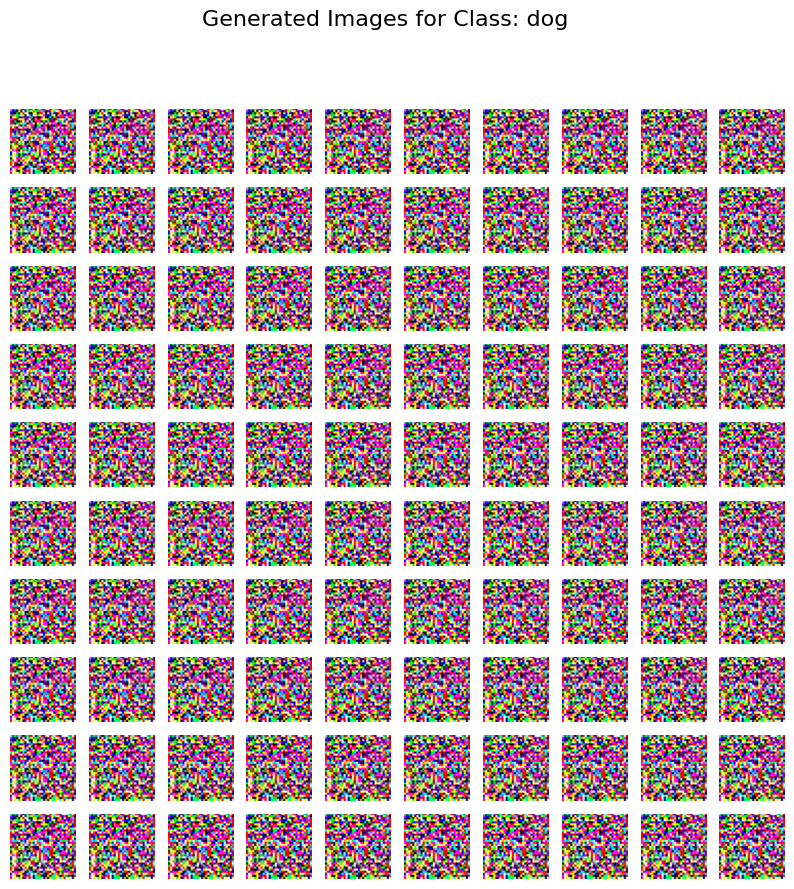

In [16]:
# CIFAR-10 class names
cifar10_class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Example of how to use the functions after training:
# Assuming 'generator' is your trained generator model and 'noise_size' is defined

# Prompt user for class input
try:
    class_input = input(f"Enter the class you want to generate images for ({', '.join(cifar10_class_names)}): ")
    target_class_name = class_input.lower()

    if target_class_name in cifar10_class_names:
        target_class_index = cifar10_class_names.index(target_class_name)
        print(f"Generating images for class: {cifar10_class_names[target_class_index]}")

        # Generate and plot images (e.g., 100 images)
        num_images_to_generate = 100
        generated_imgs = generate_images(generator, noise_size, num_images_to_generate, target_class_index)
        plot_images(generated_imgs, cifar10_class_names[target_class_index])
    else:
        print("Invalid class name. Please enter one of the CIFAR-10 class names.")

except NameError:
    print("Error: The 'generator' or 'noise_size' variables are not defined. Please ensure the training loop has been run successfully.")
except Exception as e:
    print(f"An error occurred: {e}")